# Problem Statement
- In this project i will build a credit scoring model. The goal of this project is to give the score of the loan application based on its financial history.
- If the scoe is high customer application is good to go else customer applicaion is rejected.

# Install Libraraies

In [2]:
!pip install datasets

In [3]:
!pip install ucimlrepo

# Import packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [9]:
from datasets import load_dataset

# df = load_dataset("AiresPucrs/german-credit-data")
df=pd.read_csv("credit_modling.csv")

In [11]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


# Converting the data into pandas dataframe

In [15]:
df=df['train'].to_pandas()

In [13]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Data Preprocessing
- Shape of data
- Columns of data
- Null Values
- Duplicates
- Statistical Summary

# Shape of data

In [17]:
df.shape

(1000, 10)

**Data Contain `1000` rows and `10` columns**

In [20]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

- `Age` Age of the customer.
- `Sex` Gender of the customer (Male,Female)
- `Job` Job show that weather the customer is employed or not.
- `Housing` It show that customer have its own house or not
- `Saving account` Customer Svaing account.
- `Checking Account` Weather the customer can check his account or not.
- `Credit Amount` It show that how much amount customer can taken
- `Duration` The duration of the credit or loan ( possibly in months or years).
- `Purpose`  The purpose of the loan or credit (e.g., car loan, mortgage, etc.).
- `Risk`  The target column, indicating whether the customer's application is considered high-risk or not.

# Null Values

In [24]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [26]:
df.isnull().mean()*100

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

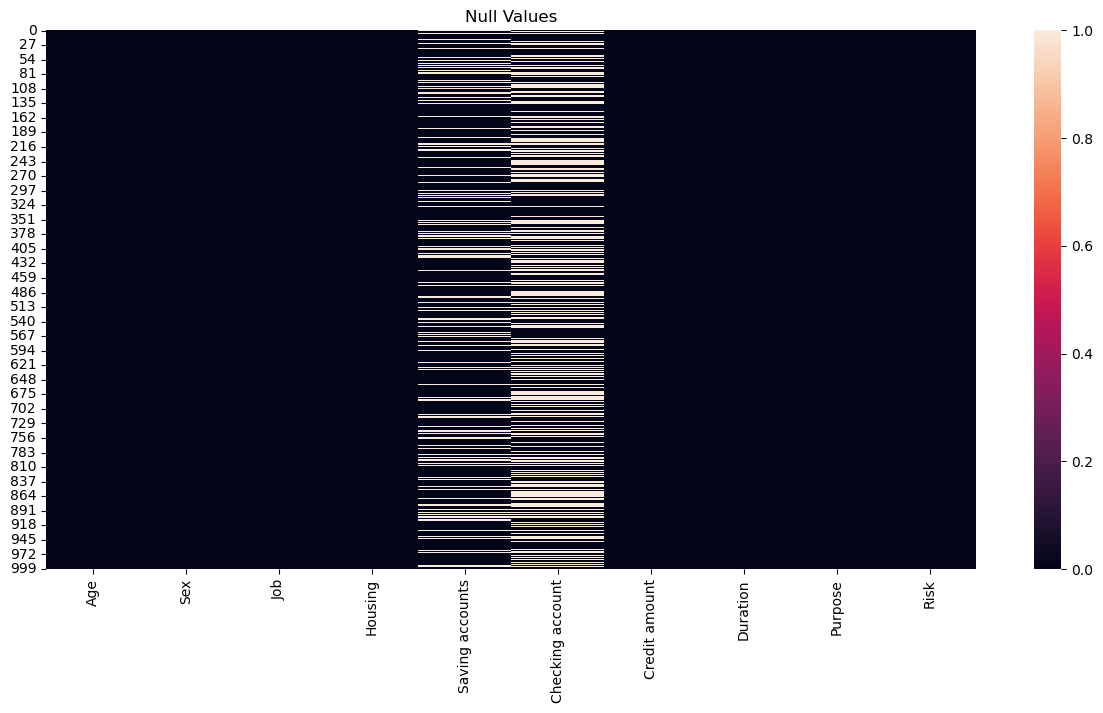

In [28]:
plt.figure(figsize=(15,7))
plt.title("Null Values")
sns.heatmap(df.isnull())
plt.show()

# Observation
- We see that `Saving account` Contain 18% missing values and `Checking Account` Contain 39% missing values.

# Datatypes

In [99]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

# Duplicates

In [32]:
df.duplicated().sum()

0

# Statistical Summary

In [101]:
df.describe(include='number')

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


# Observation
- `Age` In age columns minimum age is `19` and maximumn age is `75` and `35` is the mean age.
- `Credit Amount` Minimum amount is `250` and maximum amount is `18424` but mean is `3271`.
- `Duration` Minimum duration of return amount is `4 months` and maximum duration i `72` months but mean is `20 months`

In [38]:
df.describe(include="object")

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [47]:
for i in df.describe(include="object").columns:
    print(i)
    print("Unique Values: ",df[i].unique())
    print("Total Unique Values: ",df[i].nunique())
    print("*"*100)
    print()

Sex
Unique Values:  ['male' 'female']
Total Unique Values:  2
****************************************************************************************************

Housing
Unique Values:  ['own' 'free' 'rent']
Total Unique Values:  3
****************************************************************************************************

Saving accounts
Unique Values:  [nan 'little' 'quite rich' 'rich' 'moderate']
Total Unique Values:  4
****************************************************************************************************

Checking account
Unique Values:  ['little' 'moderate' nan 'rich']
Total Unique Values:  3
****************************************************************************************************

Purpose
Unique Values:  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Total Unique Values:  8
****************************************************************************************************

Ris

In [51]:
df.info(show_counts=True,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


# Exploratory Data Analysis

## UniVariate Analysis(Numerical)

In [57]:
df.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


# Function for ploting

In [83]:
def check_distrubution(df,col):
    # Create subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))
    
    # Histogram
    sns.histplot(df[col], ax=ax1, kde=True)  # KDE for smooth curve
    ax1.set_title(f"Distribution of {col}")
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')
    
    # Box plot
    sns.boxplot(y=df[col], ax=ax2)
    ax2.set_title(f"Box Plot of {col}")
    ax2.set_xlabel(col)
    
    # Violin plot
    sns.violinplot(y=df[col], ax=ax3)
    ax3.set_title(f"Violin Plot of {col}")
    ax3.set_xlabel(col)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Age

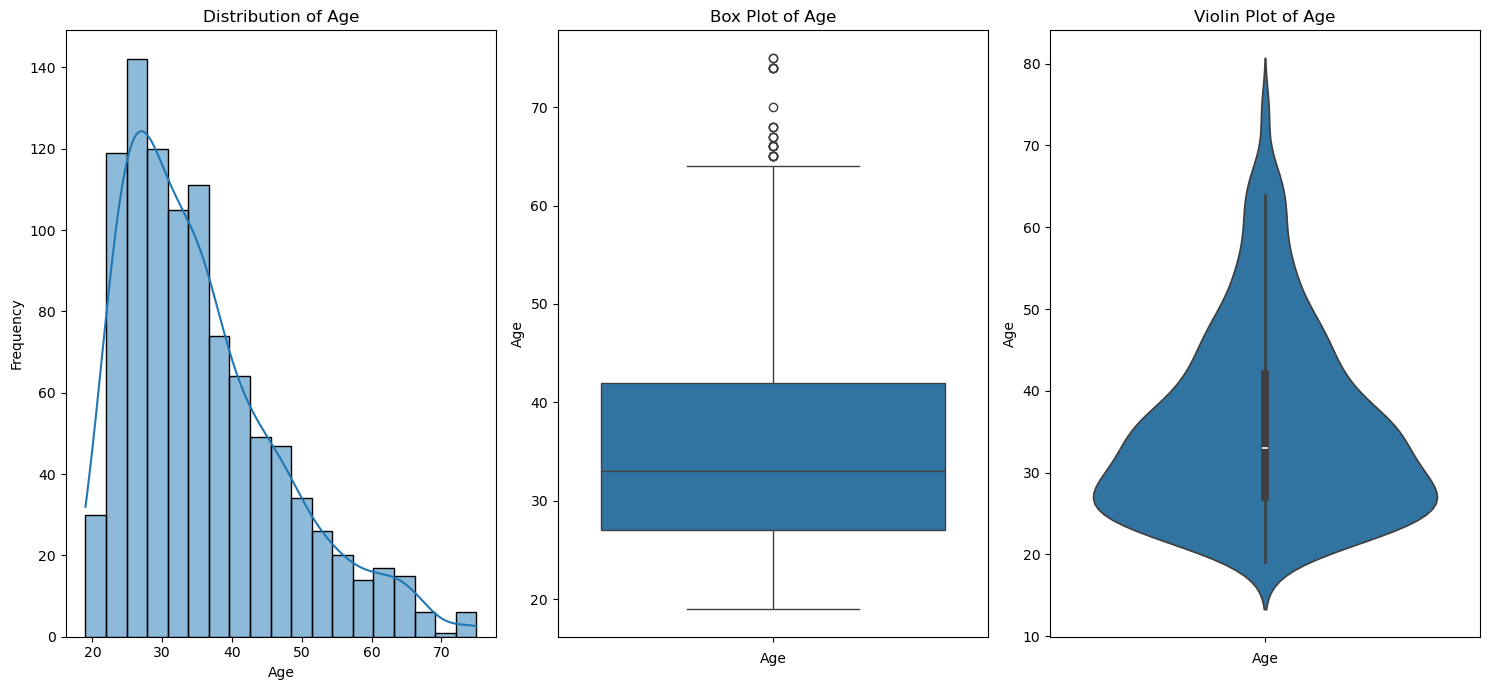

In [86]:
check_distrubution(df=df,col="Age")

# Credit amount

In [73]:
df.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


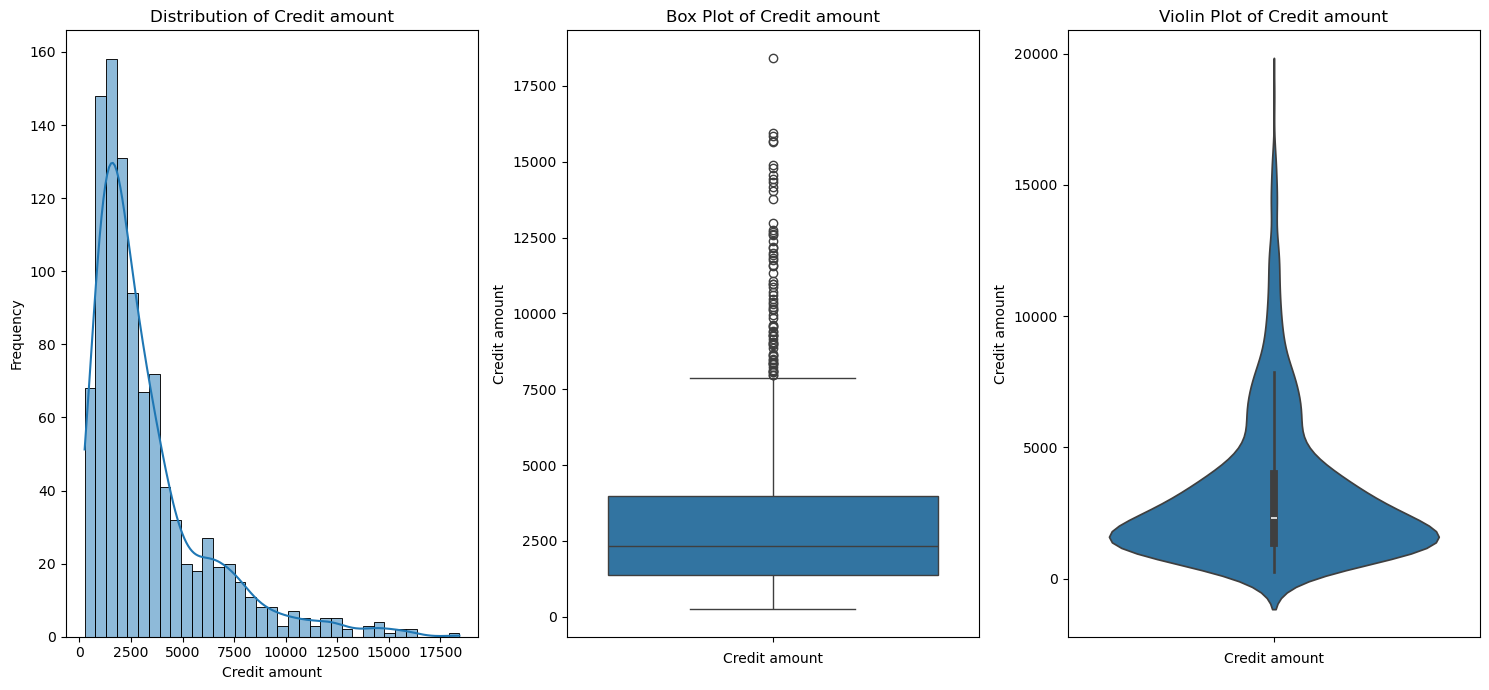

In [88]:
check_distrubution(df=df,col='Credit amount')

# Observation
- we can see that `Credit Amount` contain outliers.
- we can reudce the impact of outlier by appling some transformation

<Axes: >

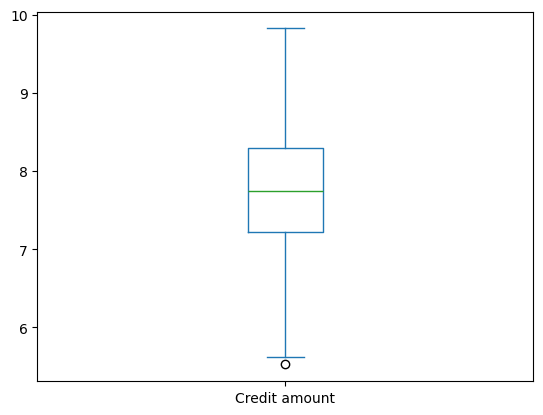

In [123]:
df['Credit amount'].apply(np.log1p).plot(kind='box')

# Duration

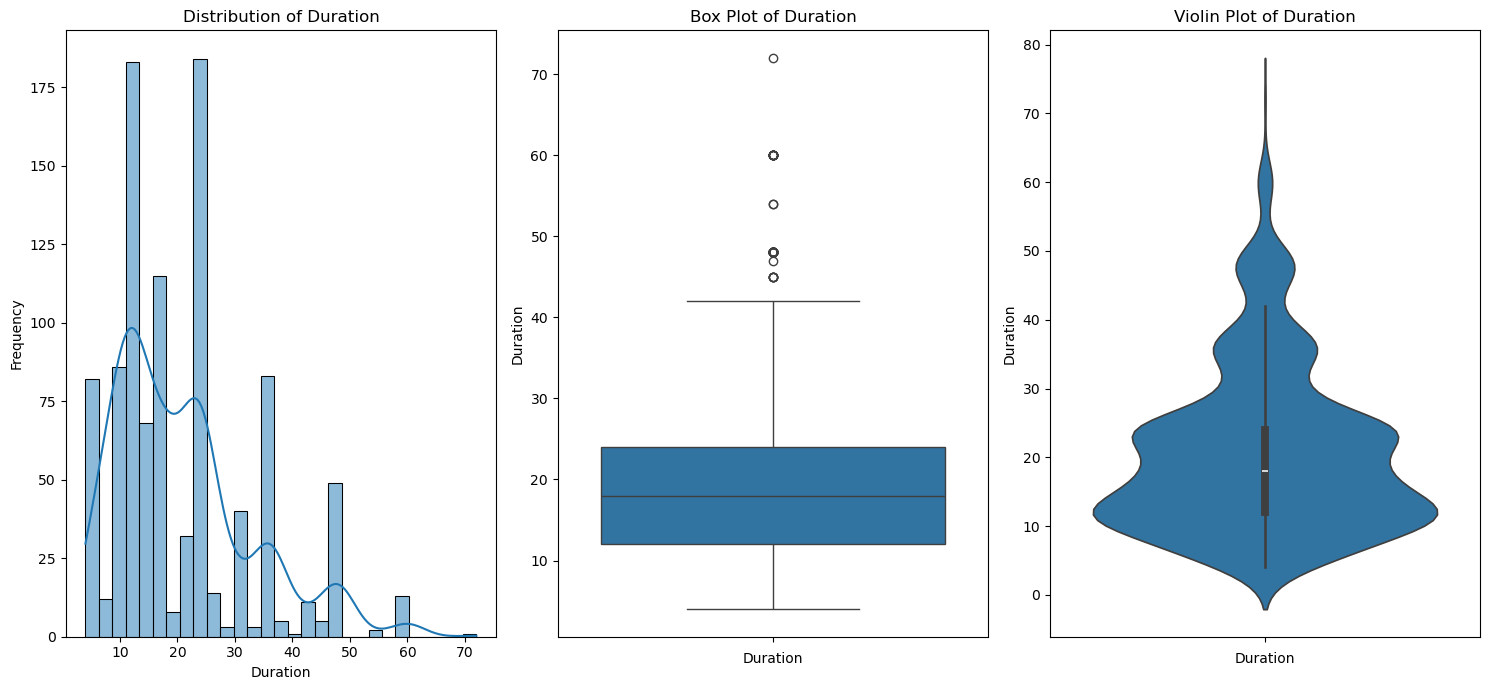

In [130]:
check_distrubution(df=df,col='Duration')

In [138]:
df[df["Duration"]>60]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


# observation
- we can see that there is only one person whose duation is 70 so we can remove them

In [143]:
df=df[~(df["Duration"]>60)]

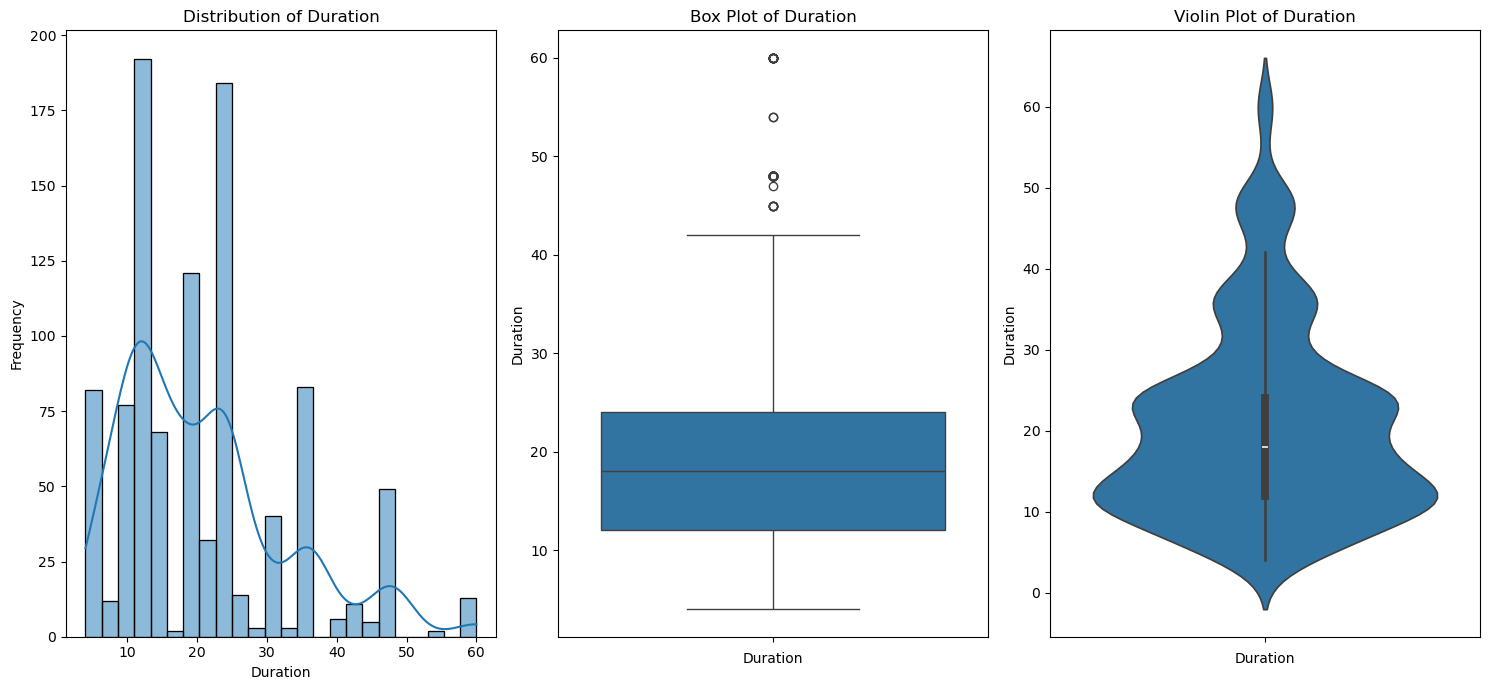

In [145]:
check_distrubution(df=df,col='Duration')

# Categorical Distrubution

In [189]:
def cat_dist(df,col):
    temp=df[col].value_counts()
    
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
    ax1.set_title(f"Distrubution of {col}")
    sns.barplot(x=temp.index,y=temp.values,ax=ax1)
    ax1.set_xlabel("Index")
    ax1.set_ylabel("counts")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90) 
    
    ax2.set_title(f"Distribution of {col}")
    ax2.pie(temp.values, labels=temp.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    
    plt.show()


In [191]:
df.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good


# Sex

C:\Users\Manan Computer\AppData\Local\Temp\ipykernel_4296\1974622331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


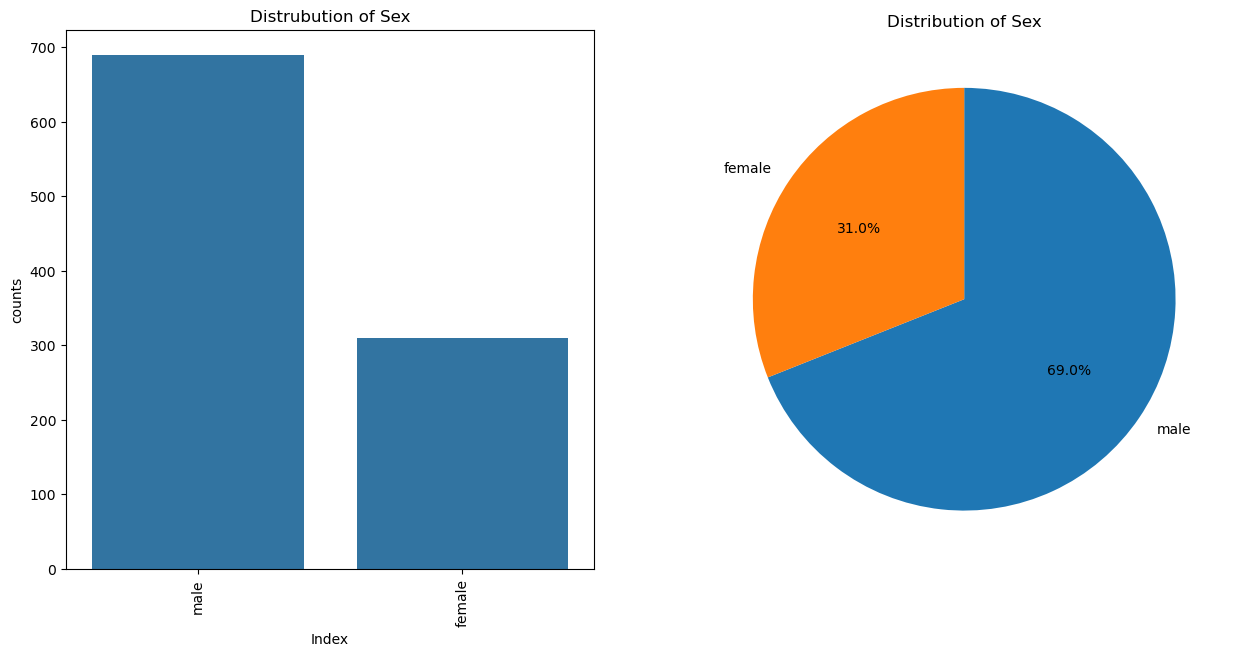

In [194]:
cat_dist(df=df,col='Sex')

# Observation
- Data is imbalance dta contain more male and less nbr of female.

# Job

C:\Users\Manan Computer\AppData\Local\Temp\ipykernel_4296\1974622331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


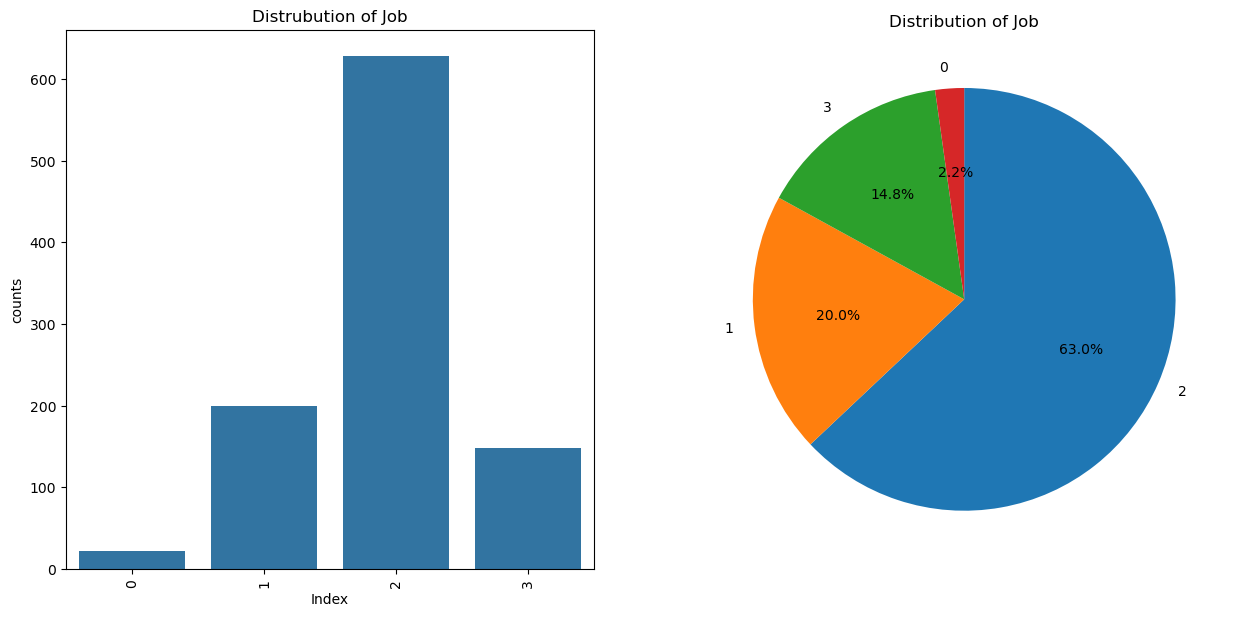

In [198]:
cat_dist(df=df,col='Job')

In [200]:
df.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good


# Now we can itrate the loop and check the whole distrubution

C:\Users\Manan Computer\AppData\Local\Temp\ipykernel_4296\1974622331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


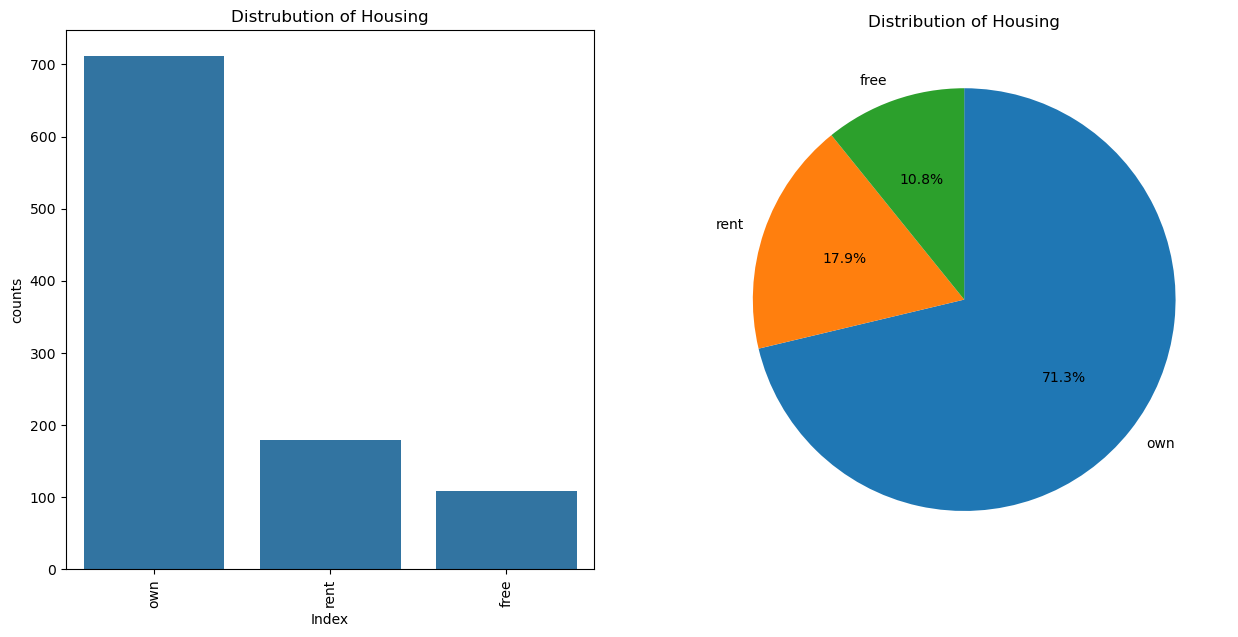

C:\Users\Manan Computer\AppData\Local\Temp\ipykernel_4296\1974622331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


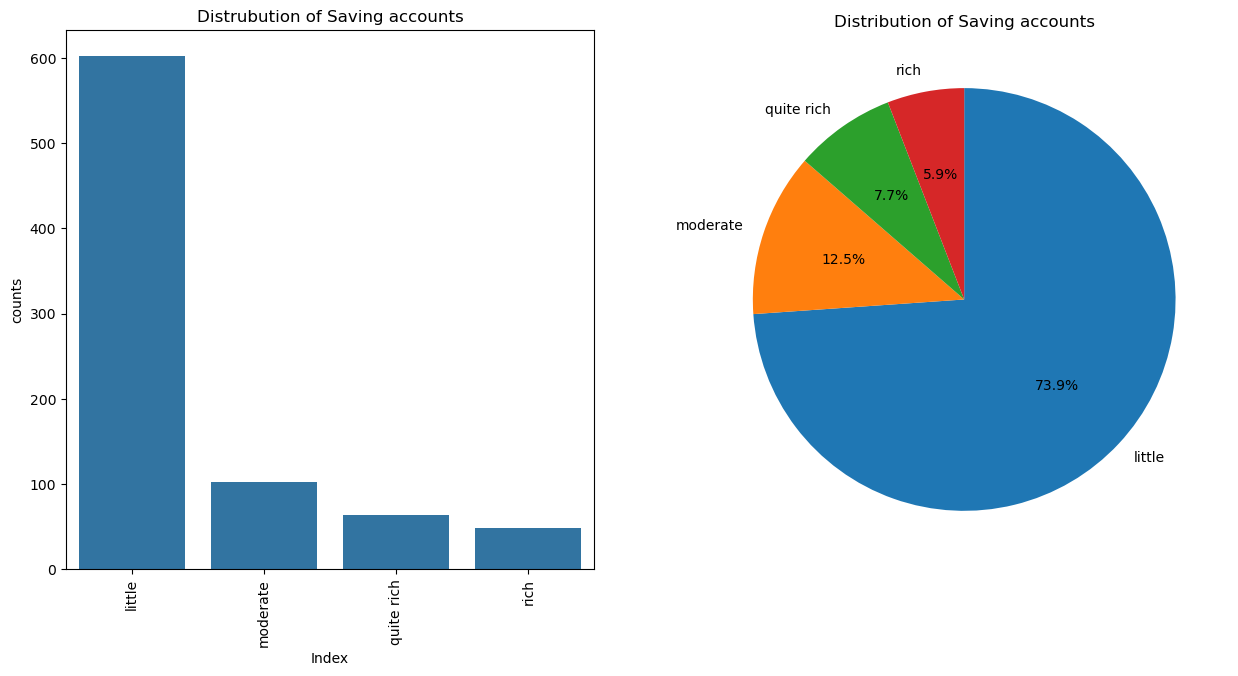

C:\Users\Manan Computer\AppData\Local\Temp\ipykernel_4296\1974622331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


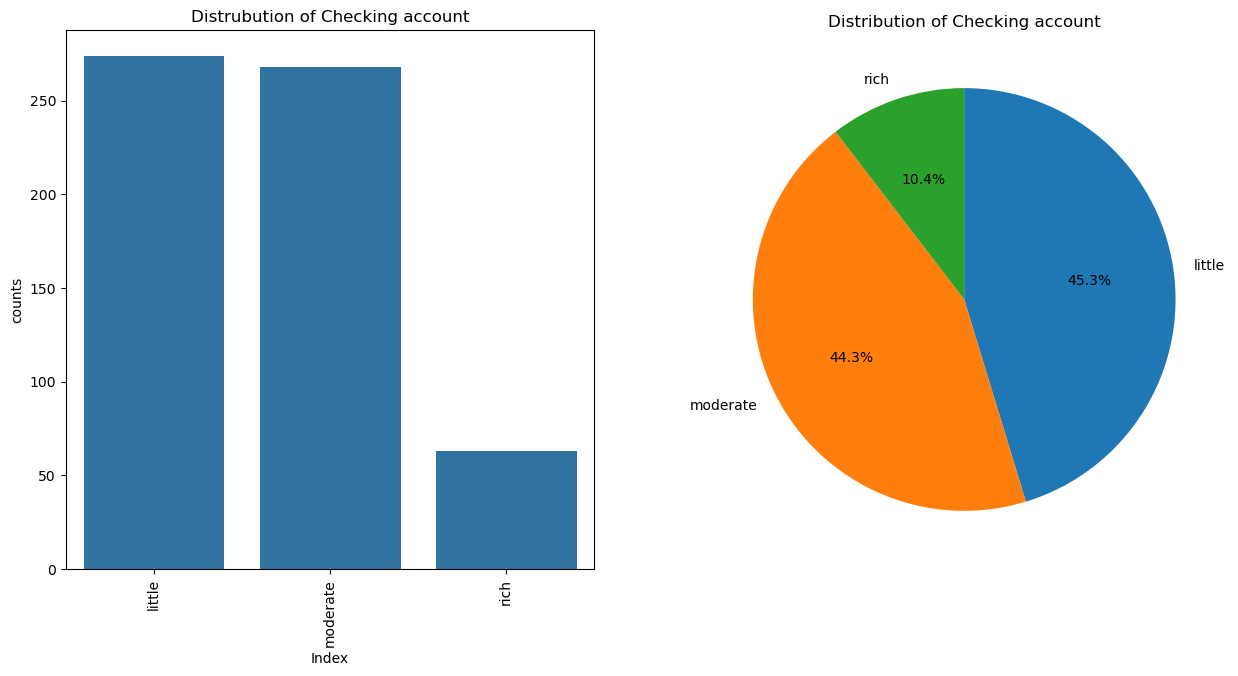

C:\Users\Manan Computer\AppData\Local\Temp\ipykernel_4296\1974622331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


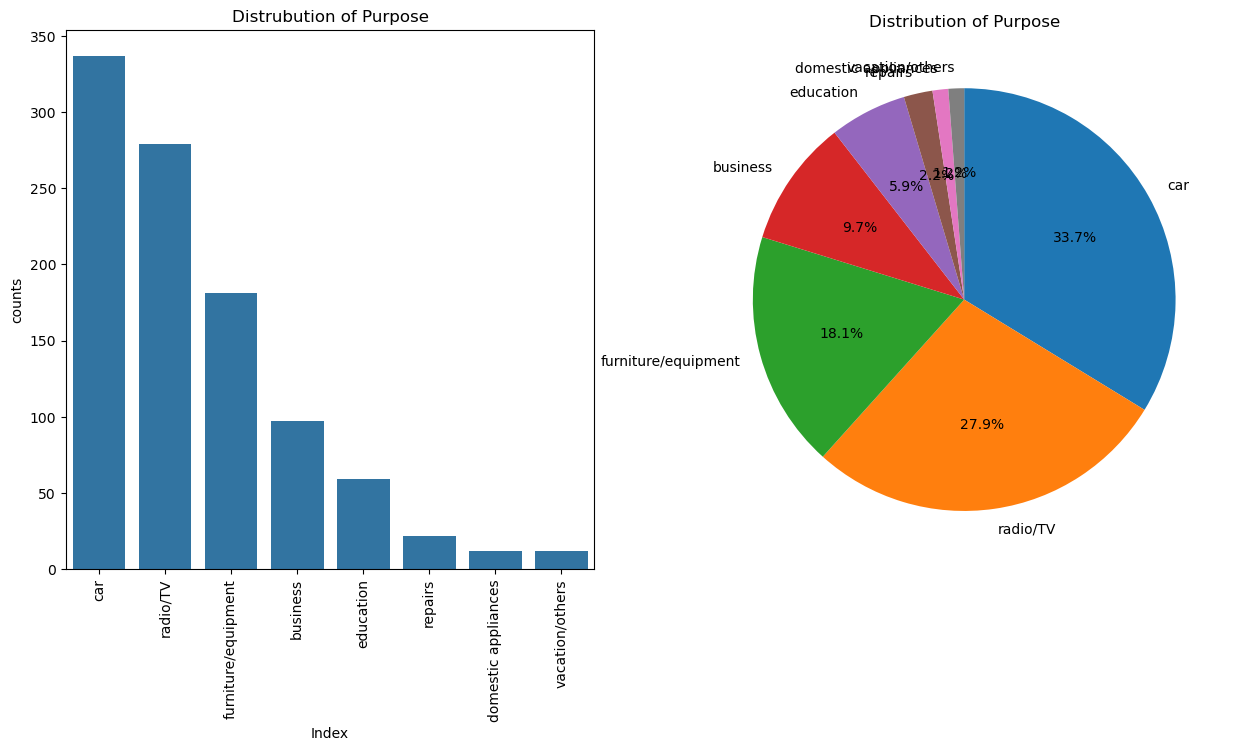

C:\Users\Manan Computer\AppData\Local\Temp\ipykernel_4296\1974622331.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


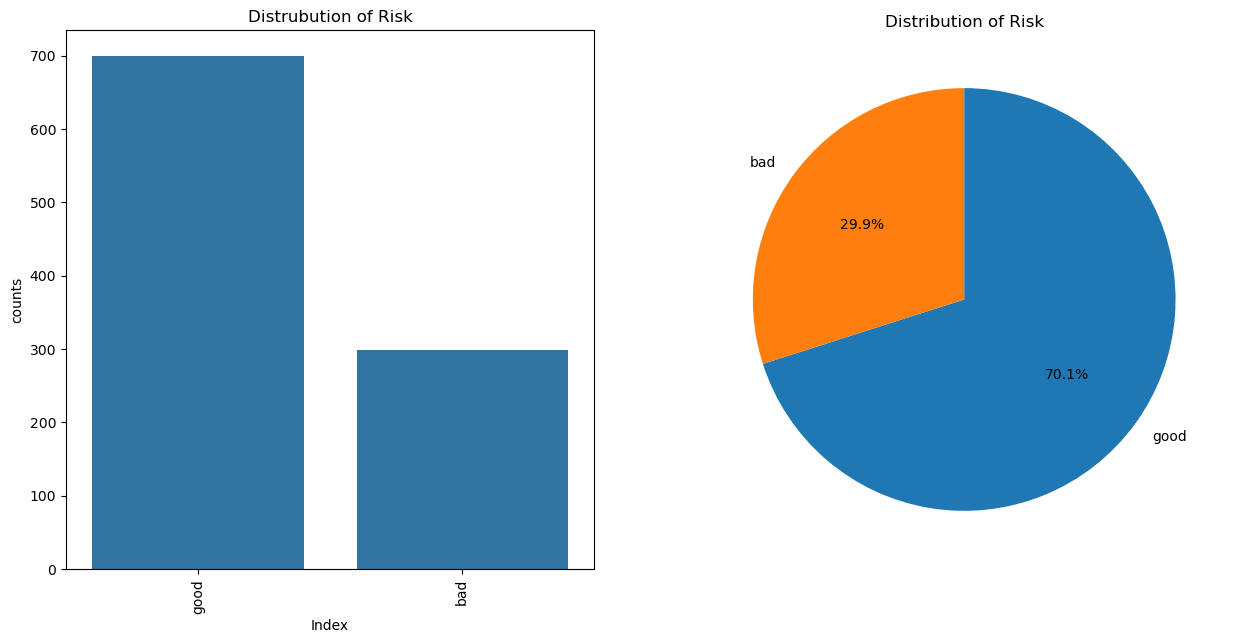

In [203]:
for i in df.select_dtypes("object").columns:
    if i!="Sex":
        cat_dist(df=df,col=i)
        print()

# Observation
- ## Housing
    - We can see that `71`of  the customer have its own house `17%`  can live in the rent house and `10%` live free mean that they live with their parents stc.
- ## Saving Accounts
    - `73%` of the people have little saving amount, `12%` are moderate, `5.9%` rich and `7.7%` are quite rich saving amount.
- ## Purpose
    - Most of the people can take loan to buy a car,Tv and furnetitures.
- ## Risk
    - we can see that target col is imbalance `70%` applications are good and `29%` application are bad.

# Bivariate Analysis

In [207]:
df.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good


# Num-Cat

## Risk vs Age

In [232]:
def num_cat_dis(df,num_col,cat_col):
    temp=df.groupby([cat_col])[num_col].median().reset_index()
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    ax1.set_title(f"Distrubution of {num_col} and {cat_col}")
    sns.barplot(x=temp[cat_col],y=temp[num_col],ax=ax1)

    ax2.set_title(f"Distrubution of {num_col} and {cat_col}")
    plt.pie(temp[num_col],labels=temp[cat_col],autopct='%.2f')
    plt.show()

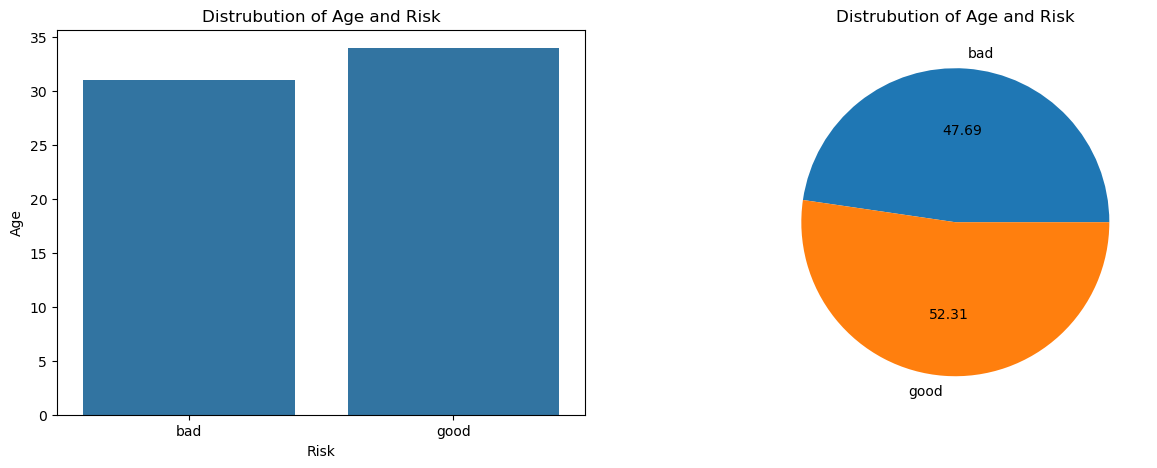

In [234]:
num_cat_dis(df=df,num_col="Age",cat_col="Risk")

# Observation
- we can see that if the age is more customer can able to pay while if the age is less customer will not able to pay loan.
- It logical b/c less age person have not job so that they do not able to pay loan

# Risk vs Credit Amount

In [237]:
df.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good


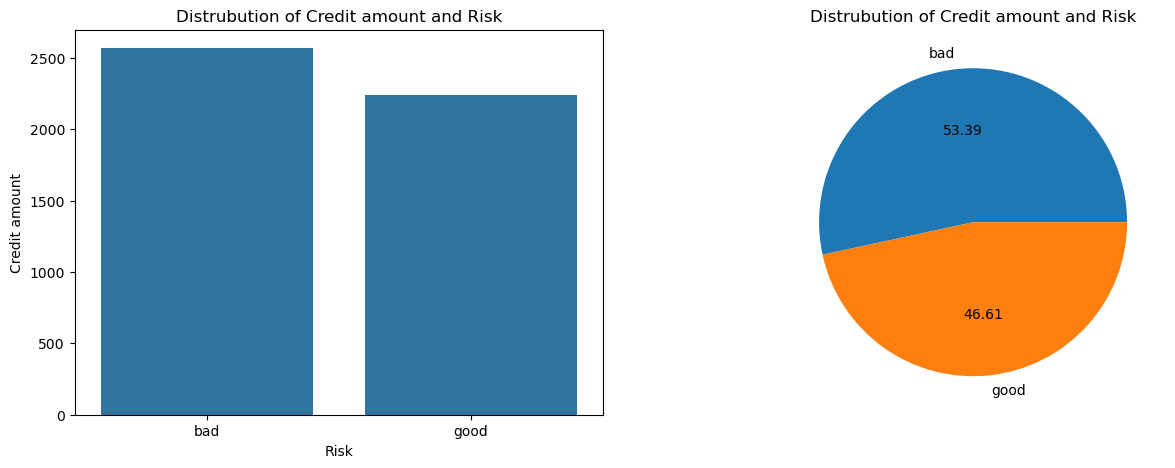

In [240]:
num_cat_dis(df=df,num_col="Credit amount",cat_col="Risk")

# Observation
- we can see if the customer can take high loan they do not pay and if the customer can take less loan they can easily pay.

# Duration Vs Risk

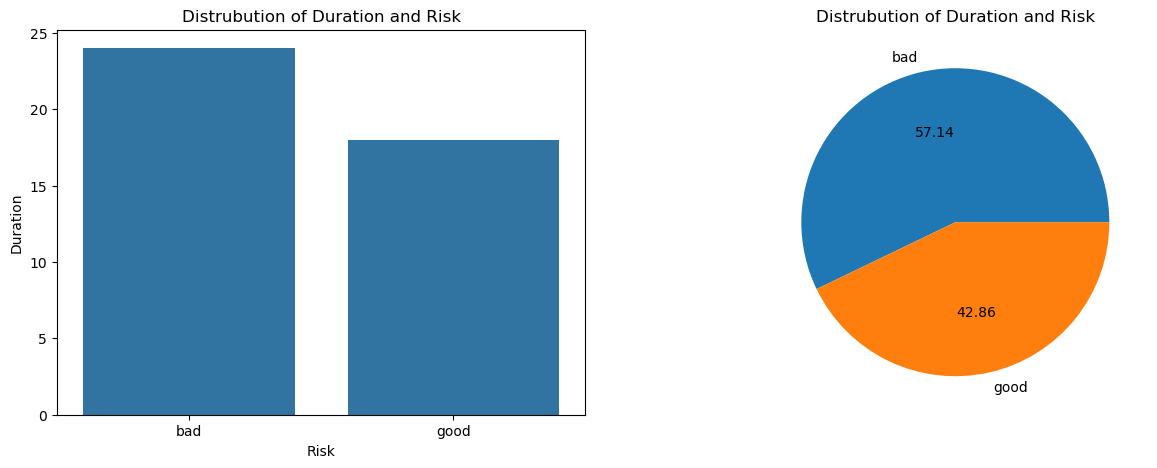

In [247]:
num_cat_dis(df=df,num_col="Duration",cat_col="Risk")

In [249]:
df.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good


# Cat-Cat

# Risk vs Sex

In [292]:
def cat_cat_plot(df,cat_col,target_col):
    crosstab=pd.crosstab(df[target_col],df[cat_col],normalize="index")

    # Melt the cross-tabulation for easier plotting
    crosstab_melted = crosstab.reset_index().melt(id_vars=target_col, var_name=cat_col, value_name='Proportion')
    
    # Plot the bar plot
    plt.figure(figsize=(12, 5))
    sns.barplot(x=cat_col, y='Proportion', hue=target_col, data=crosstab_melted, palette='Set2')
    
    plt.title(f'Normalized Bar Plot of {target_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('Proportion')
    plt.legend(title=target_col)
    plt.show()

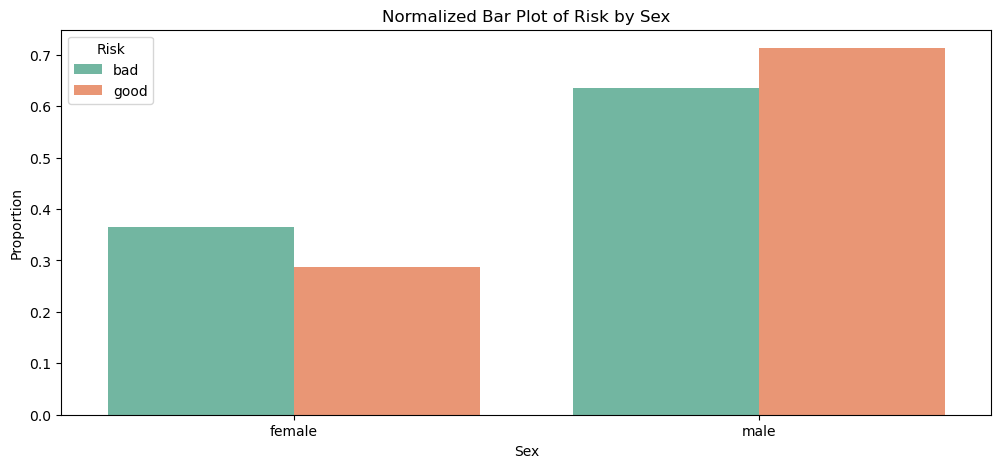

In [296]:
cat_cat_plot(df=df,cat_col='Sex',target_col="Risk")

# Observation
- Ratio of bad application in `Female` is greater then the ration of `male`.
- We can also see that most of the female can't pay the loan incase of male.

In [299]:
df.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good


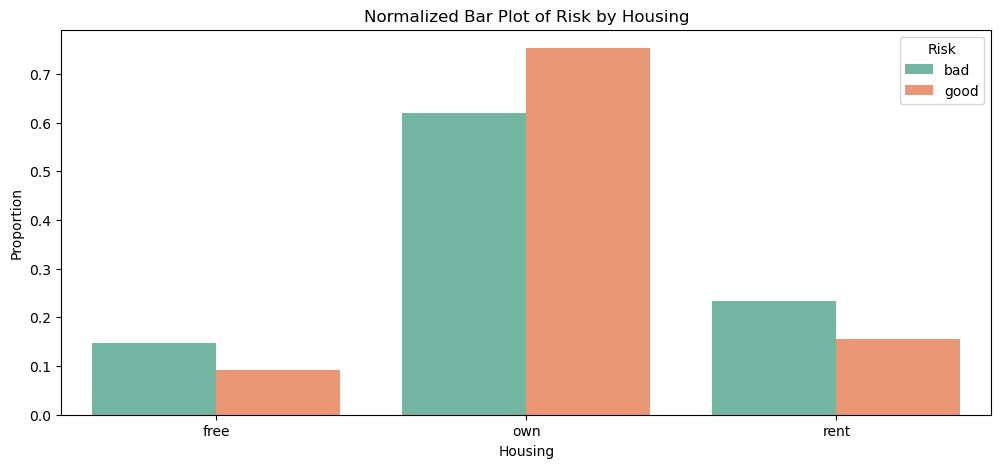

In [301]:
cat_cat_plot(df=df,cat_col="Housing",target_col="Risk")

# Observation
- `Own House`
    - Ration of good is greater then the ration of bad mean people who have own house who can easily pay the loan.
- `Rent`
    - Ration of good is less then the ration of bad mean people who can live in rent house most of the people can't pay the loan.
- `Free`
    - Ration of good is less then the ration of bad they are those people who can live with parents,gradient etc most of them can't pay the loan.

# Saving Account Vs Risk

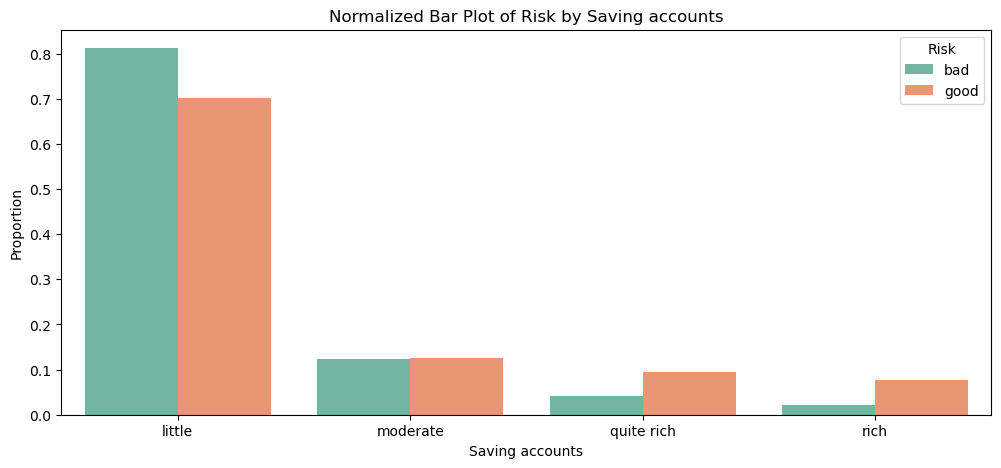

In [307]:
cat_cat_plot(df=df,cat_col="Saving accounts",target_col="Risk")

# Observation
- `Little`
    - For Little amount of person can't pay the loan.
- `Quite Rich` and `Rich`
    - These type of persons easily pay the loans.

# Purchase Vs Risk

In [310]:
df.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good


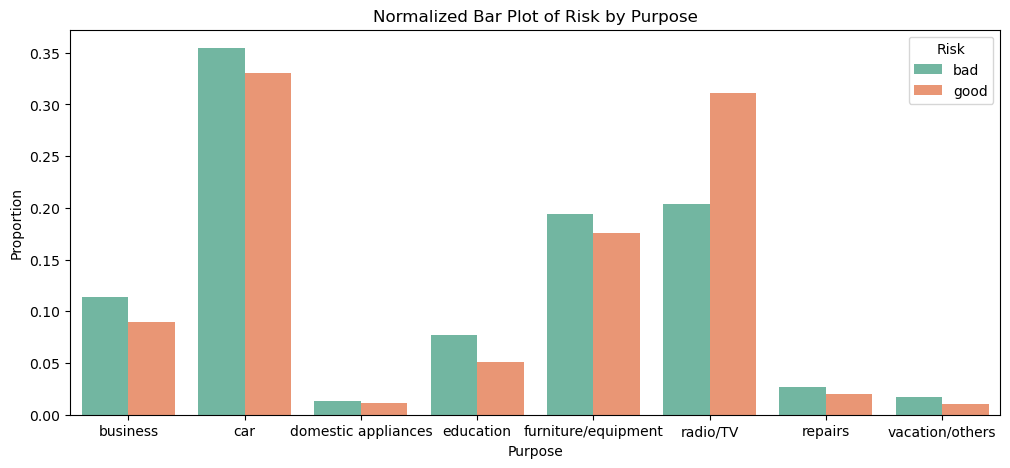

In [314]:
cat_cat_plot(df=df,cat_col="Purpose",target_col="Risk")

# Observation
- `Business`
     - In businness raion of bad > then the ration of good mean that people who can buy loan for business most of them can't pay the loan.

- `Car`
     - In Cat raion of bad > then the ration of good mean that people who can buy loan for purchasing car most of them can't pay the loan.

- `Appliance`
     - In appliance raion of bad > then the ration of good mean that people who can buy loan for buyyig appliance most of them can't pay the loan.

- **Similarly for `Education` ,`Furneture`, `Reparing`,`Vacation`**

- But `Pople who can take loan for buying TV/Radio` who can only pay the loan.

# Check the distrubuoton of col before and after filling the missing values

In [330]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [344]:
temp['Checking account']=temp['Checking account'].fillna("missing")

In [369]:
temp['Saving accounts']=temp['Saving accounts'].fillna("missing")

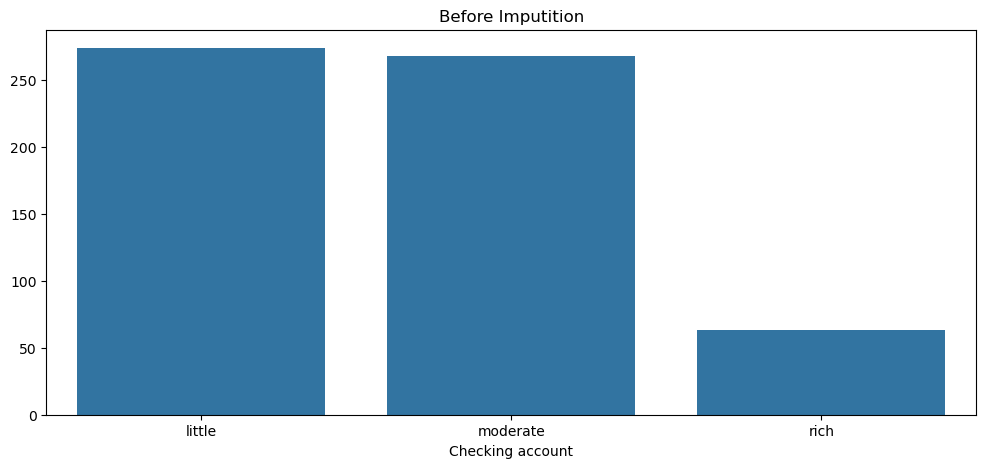

In [364]:
plt.figure(figsize=(12,5))
plt.title("Before Imputition")
sns.barplot(x=df["Checking account"].value_counts().index,
            y=df["Checking account"].value_counts().values)
plt.show()

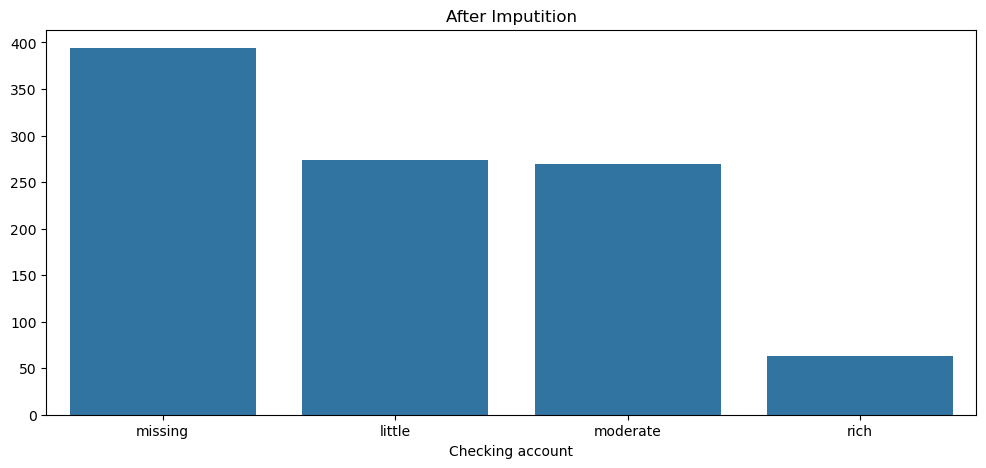

In [366]:
plt.figure(figsize=(12,5))
plt.title("After Imputition")
sns.barplot(x=temp["Checking account"].value_counts().index,
            y=temp["Checking account"].value_counts().values)
plt.show()

# Observation
- We can see that `checking account` col contain more missing value due to this reason its distrubution should be change.

# Saving accounts

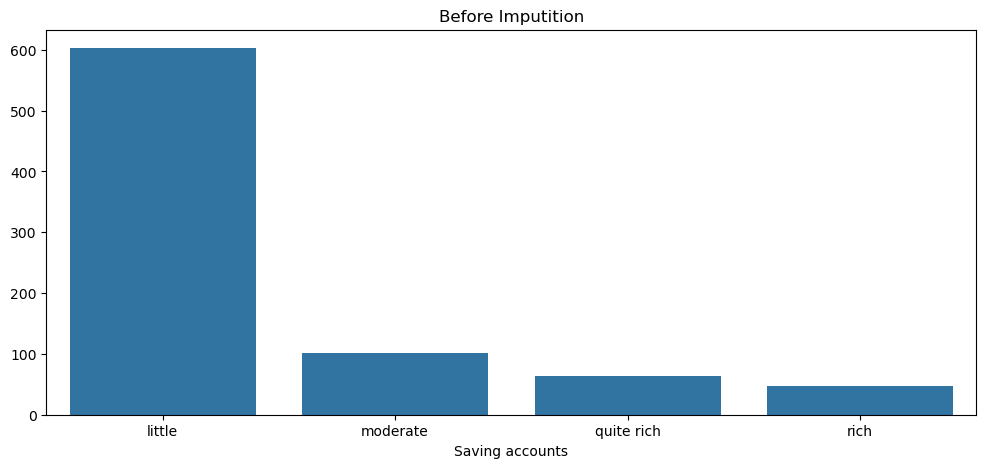

In [372]:
plt.figure(figsize=(12,5))
plt.title("Before Imputition")
sns.barplot(x=df["Saving accounts"].value_counts().index,
            y=df["Saving accounts"].value_counts().values)
plt.show()

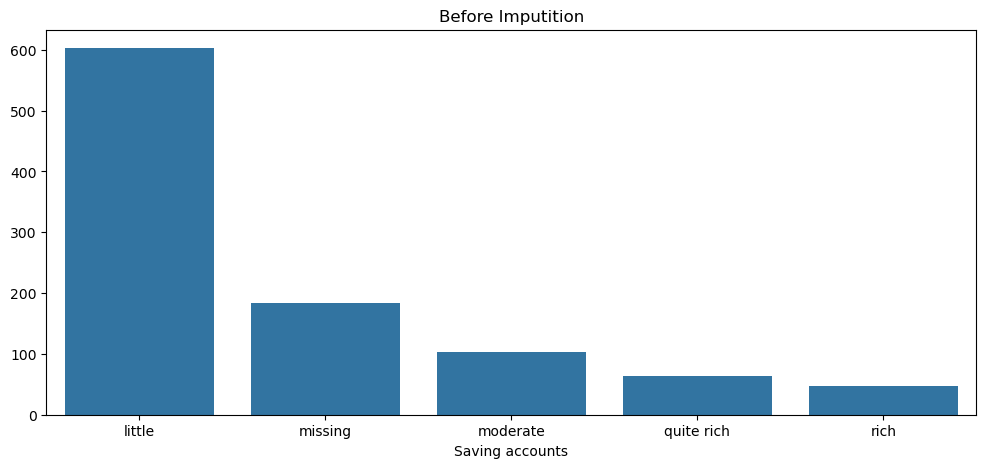

In [374]:
plt.figure(figsize=(12,5))
plt.title("Before Imputition")
sns.barplot(x=temp["Saving accounts"].value_counts().index,
            y=temp["Saving accounts"].value_counts().values)
plt.show()

# Observation
- we can see that if we can fill the missing values with `missing` distrubution should be change b/c missibg value is more.
- But using this we can able to teach the model to classiy the b/w missing values and not missing value

# Rename Some value in `Purpose` col

In [317]:
df['Purpose'].value_counts()

Purpose
car                    337
radio/TV               279
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [319]:
def rename_purpose(value):
    if value=='radio/TV':
        return "TV"
    elif value=="furniture/equipment":
        return "furniture"
    elif value=="vacation/others":
        return "Others"
    else:
        return value

In [323]:
df["Purpose"]=df["Purpose"].apply(rename_purpose)

C:\Users\Manan Computer\AppData\Local\Temp\ipykernel_4296\3453655077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Purpose"]=df["Purpose"].apply(rename_purpose)


In [326]:
df['Purpose'].value_counts()

Purpose
car                    337
TV                     279
furniture              181
business                97
education               59
repairs                 22
domestic appliances     12
Others                  12
Name: count, dtype: int64

# Model Building

In [505]:
from sklearn.model_selection import train_test_split,cross_val_score

In [388]:
# saperate feaature and label
featuer=df.drop(columns=["Risk"])
label=df["Risk"]

In [412]:
label=label.map({
    "good":1,
    "bad":0
})

In [415]:
featuer.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,TV
1,22,female,2,own,little,moderate,5951,48,TV


In [417]:
label.head(1)

0    1
Name: Risk, dtype: int64

In [419]:
x_train,x_test,y_train,y_test=train_test_split(featuer,label,test_size=0.2,random_state=43)

In [421]:
x_train.shape

(799, 9)

In [423]:
x_test.shape

(200, 9)

# Saperate numerical and categorical cols

In [426]:
num_col=featuer.select_dtypes("number").columns
cat_col=featuer.select_dtypes("object").columns

In [428]:
num_col

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

In [430]:
cat_col

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object')

# Building pipelines

In [436]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer

# Numerical pipeline

In [439]:
num_pipe=Pipeline(
    steps=[
        ("Impute",SimpleImputer(strategy="median")),
        ("Scale",StandardScaler())
    ]
)
num_pipe

Pipeline(steps=[('Impute', SimpleImputer(strategy='median')),
                ('Scale', StandardScaler())])

# Cat_pipeline

In [442]:
cat_pipe=Pipeline(
    steps=[
        ("Impute",SimpleImputer(strategy="constant",fill_value="missing")),
        ("Scale",OneHotEncoder(drop="first",sparse_output=False,handle_unknown='ignore'))
    ]
)
cat_pipe

Pipeline(steps=[('Impute',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('Scale',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

# Build the transformer

In [445]:
processor=ColumnTransformer(transformers=[
    ("Num_trans",num_pipe,num_col),
    ("cat_tans",cat_pipe,cat_col)
],remainder="passthrough")
processor

ColumnTransformer(remainder='passthrough',
                  transformers=[('Num_trans',
                                 Pipeline(steps=[('Impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scale', StandardScaler())]),
                                 Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')),
                                ('cat_tans',
                                 Pipeline(steps=[('Impute',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('Scale',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object'))])

# Final Pipeline

In [541]:
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier,BaggingClassifier)
from sklearn.tree import (DecisionTreeClassifier)
from sklearn.linear_model import LogisticRegression

In [486]:
final=Pipeline(steps=[
    ("processor",processor),
    ("Model",RandomForestClassifier(class_weight="balanced"))
])
final

Pipeline(steps=[('processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num_trans',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')),
                                                 ('cat_tans',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Scale',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object'))])),
                ('Model', RandomForestClassifier(class_weight='balanced'))])

In [488]:
final.fit(x_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num_trans',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')),
                                                 ('cat_tans',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Scale',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object'))])),
                ('Model', RandomForestClassifier(class_weight='balanced'))])

In [489]:
y_pred=final.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [492]:
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,confusion_matrix)

In [494]:
def classification_results(actual,predicion):
    result={
        "Accuracy":accuracy_score(actual,predicion),
        "Precesion":precision_score(actual,predicion,average='weighted'),
        "Recall":recall_score(actual,predicion,average='weighted'),
        "F1-Score":f1_score(actual,predicion,average='weighted')
    }
    return result

In [496]:
classification_results(actual=y_test,predicion=y_pred)

{'Accuracy': 0.75,
 'Precesion': 0.7354272127626936,
 'Recall': 0.75,
 'F1-Score': 0.7338794578233978}

In [498]:
confusion_matrix(y_test,y_pred)

array([[ 26,  35],
       [ 15, 124]], dtype=int64)

# Now Try all the models

In [543]:
models_dict = {
    "RandomForestClassifier": RandomForestClassifier(class_weight="balanced"),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(class_weight='balanced'),
    "LogisticRegression": LogisticRegression(class_weight='balanced'),
    "BaggingClassifier":BaggingClassifier()
}

In [545]:
result={
        "Model_name":[],
        "Accuracy":[],
        "Precesion":[],
        "Recall":[],
        "F1-Score":[],
        "train_score":[],
        "test_score":[]
}
for model_name,model in models_dict.items():
    print(model_name)
    final=Pipeline(steps=[
    ("processor",processor),
    ("Model",model)
    ])

    final.fit(x_train,y_train)

    y_pred=final.predict(x_test)

    train_score=cross_val_score(final,x_train,y_train,cv=5,scoring='accuracy').mean()
    test_score=cross_val_score(final,x_test,y_test,cv=5,scoring='accuracy').mean()
    
    
    acc=accuracy_score(y_test,y_pred)
    pre=precision_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred)
    f_score=f1_score(y_test,y_pred)
    
    result["Model_name"].append(model_name)
    result["test_score"].append(test_score)
    result["train_score"].append(train_score)
    result["Accuracy"].append(acc)
    result["Precesion"].append(pre)
    result["Recall"].append(rec)
    result["F1-Score"].append(f_score)

RandomForestClassifier
AdaBoostClassifier


C:\Users\Manan Computer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Manan Computer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Manan Computer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Manan Computer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

GradientBoostingClassifier
DecisionTreeClassifier
LogisticRegression
BaggingClassifier


In [546]:
pd.DataFrame(result).sort_values(by='F1-Score',ascending=False)

,Model_name,Accuracy,Precesion,Recall,F1-Score,train_score,test_score
2,GradientBoostingClassifier,0.745,0.765060,0.913669,0.832787,0.750888,0.720
0,RandomForestClassifier,0.745,0.778481,0.884892,0.828283,0.727131,0.715
5,BaggingClassifier,0.715,0.788732,0.805755,0.797153,0.708365,0.705
1,AdaBoostClassifier,0.695,0.750000,0.841727,0.793220,0.728388,0.670
3,DecisionTreeClassifier,0.685,0.767606,0.784173,0.775801,0.673365,0.655
4,LogisticRegression,0.650,0.828571,0.625899,0.713115,0.689568,0.635


# Get the best model and train again

In [562]:
final=Pipeline(steps=[
    ("processor",processor),
    ("Model",GradientBoostingClassifier())
])
final

Pipeline(steps=[('processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num_trans',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')),
                                                 ('cat_tans',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Scale',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object'))])),
                ('Model', GradientBoostingClassifier())])

In [564]:
final.fit(x_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num_trans',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')),
                                                 ('cat_tans',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Scale',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], dtype='object'))])),
                ('Model', GradientBoostingClassifier())])

In [566]:
y_pred=final.predict(x_test)

In [568]:
classification_results(actual=y_test,predicion=y_pred)

{'Accuracy': 0.745,
 'Precesion': 0.7290698086463502,
 'Recall': 0.745,
 'F1-Score': 0.7200500431406384}

In [570]:
confusion_matrix(y_test,y_pred)

array([[ 22,  39],
       [ 12, 127]], dtype=int64)

# Save the model and preocessor

In [575]:
import pickle as pkl

In [589]:
with open("final_model.pkl","wb")as f:
    pkl.dump(final,f)

In [587]:
with open("processor.pkl","wb")as f:
    pkl.dump(processor,f)